# Observability rank from data
In here we exemplify the estimate of observability rank direct from time series, by using the SVDO statistic [1,2].

[1] Aguirre, L.A., Letellier, C., Investigating observability properties from data in nonlinear dynamics, Phisical Reivew E, 83:066209, 2011. DOI: 10.1103/PhysRevE.83.066209.

[2] Letellier, C., Aguirre, L.A., Required criteria for recognizing new types of chaos: Application to the cord attractor, Phisical Reivew E, 85:036204, 2012. DOI: 10.1103/PhysRevE.85.036204.

We first load some modules.

In [1]:
%matplotlib inline
from __future__ import division, print_function

import numpy as np
import numpy.ma as ma
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from IPython.display import Latex

# The Cord oscillator

The time series of the x, y and z variables of the Cord attractor are already provided. For the sake of clearness, in the following we load the data and attribute each time series to the (x,y,z) numpy arrays.

In [13]:
data=np.loadtxt('cord_data.txt',delimiter=',')

x,y,z=data[:,0],data[:,1],data[:,2]
print('Time series length is',x.shape[0],'da points.')

Time series length is 18002 da points.


This system has its name given by a "cord" structure that links both sides of the attractor. In the following plot, notice that the "cord" structure is only visible through the $x$ variable.

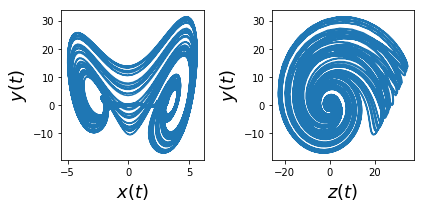

In [18]:
fig, axes=plt.subplots(1,2,figsize=(6,3))

axes[0].plot(x,y)
axes[0].set_xlabel('$x(t)$',fontsize=18)
axes[0].set_ylabel('$y(t)$',fontsize=18)

axes[1].plot(z,y)
axes[1].set_xlabel('$z(t)$',fontsize=18)
axes[1].set_ylabel('$y(t)$',fontsize=18)


fig.tight_layout()

# The SVDO statistic

The main steps of the SVDO statistics are:
1. sss
1. llll
1. llll

Lets define a function that thake one time series $\{u_i\}_{i=1}^N$ and returns the (reconstructed) trajectory matrix. Here we use the Taken's method of delay embeding.

In [26]:
def trajectory_matrix(u,delay=2,m=3):
    """Returns the trajectory matrix from the 1-D array u,
            with delay=delay and embedding dimension=m"""
    N=u.shape[0]
    W=N-(m-1)*delay
    u_rec=np.empty((W,m))

    for m_i in range(m):
        u_rec[:,m_i]=u[m_i*delay:m_i*delay+W].copy()
        
    return u_rec

We define a function that take as arguments a reference vector $\vec v$ and a colection of "candidate" neighbours $U$ (a 2-dimensional array, whose columns are the candidate vectors), and test if they are $\epsilon$-neighbours. The function returns a 2-dimensional array, whose columns are the detected neighbours, and a 1-D array with their indexes in relation to $U$. 

In [27]:
def vizinhos(U,v,epsilon=0.1):
    """
    """
    iv=np.abs(U-v).sum(axis=1)<epsilon
    return U[iv,:],iv

Finally, the SVDO statistic is computed by ...

In [28]:
def svdo(X,p=10,epsilon=1):
    """
    """
    S1p=[]
    N,d=X.shape

    for j in xrange(0,N,p):
        xv,iv=vizinhos(X,X[j,:],epsilon)
        l,c=xv.shape


        if l > d:
            S= np.linalg.svd(xv,compute_uv=False)
            S1p+=[S[0]*100/np.sum(S)]

    svdox=(np.mean(S1p)/100)/np.std(S1p)

    return np.asanyarray(S1p), svdox

# Observability rank estimate

In [23]:
# attractor size
max_x=x.max()-x.min()
max_y=y.max()-y.min()
max_z=z.max()-z.min()

# use this for a one-shot estimation
epsilon_x=0.1*max_x
epsilon_y=0.1*max_y
epsilon_z=0.1*max_z

In [29]:
delay=89
m=4
tm_x=trajectory_matrix(x,delay,m)
tm_y=trajectory_matrix(y,delay,m)
tm_z=trajectory_matrix(z,delay,m)

In [30]:
_,svdox=svdo(tm_x,p=10,epsilon=epsilon_x)
_,svdoy=svdo(tm_y,p=10,epsilon=epsilon_y)
_,svdoz=svdo(tm_z,p=10,epsilon=epsilon_z)

The expected results are 0.35 for x, and 0.04 for y
and z.

In [32]:
print(svdox,svdoy,svdoz)

0.358243674139 0.0381688752173 0.0368932041529
